## Synk Packages

In [ ]:
import requests
import collections
import glob
import os
import requests
import collections
from bs4 import BeautifulSoup
import traceback
import json
from datetime import datetime, date
import scipy as sp
import csv

def get_package():
  header = ['Vulnerability', 'Package Name', 'Details Page', 'CVE', 'POC Available', 'Affected Version', 'Github Link']

  with open('synk.csv', 'a+', encoding='UTF8') as f:
      writer = csv.writer(f)
      writer.writerow(header)

  for page_number in range(1,117):
    try:
        URL = 'https://security.snyk.io/page/'+str(page_number)+'?type=npm'
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, 'html.parser')
        # print(soup.find('div', {'class' :'vue--table__tbody'}).text)

        for item in soup.select('.vue--table__row'):
          # print(item)
          # print("\n\n\n")
          all_td = item.findAll('td')
          # for td_item in all_td:
          #   # print("This is td item", td_item)
          #   # print("\n\n")
          #   if(td_item.text.find("Jan") > -1):
          #     print("This is td item", td_item)
          #     print("\n\n")

          if len(all_td)>=4:
            published_date = str(all_td[3].text).strip()
            published_date_object = datetime.strptime(published_date, '%d %b %Y')
            given_deadline = datetime.strptime("6/Dec/2021", '%d/%b/%Y')
            if published_date_object<=given_deadline:
              data = []
              vulnerability_link = all_td[0].find("a", href=True)
              # print(vulnerability_link)

              vulnerability_type = str(vulnerability_link.text).strip()
              # print(vulnerability_type)

              full_link = "https://security.snyk.io/"+str(vulnerability_link.get("href"))
              # print(full_link)

              ##details page
              details_page = requests.get(full_link)

              details_soup = BeautifulSoup(details_page.content, 'html.parser')
              spans=details_soup.find_all('span',"cve")
              cve_txt=""
              cve_number = ""
              for list_item in spans:
                  cve_txt = list_item.find("a", href=True)
                  # print("cve",cve_txt.get("id"))
                  cve_number = str(cve_txt.get("id"))
              
              # print(cve_number)

              has_poc = False
              codeblocks= str(details_page.text).find('PoC')
              if codeblocks!=-1:
                # print("found POC")
                has_poc = True

              # package_name_link = all_td[1].find("a", {"class": "vue--anchor"})
              # print(package_name_link.text)
              links_in_span = all_td[1].find("a", href=True)
              # print(links_in_span.text.split("\n"))
              actual_package_name = links_in_span.text.split("\n")[1].strip()
              # print(actual_package_name)

              package_version_spans = all_td[1].findAll("span", {"class": "vulns-table__semver"})
              # print(package_version_span)
              full_version_list = ""
              for span in package_version_spans:
                # print("Span", span.text)
                full_version_list+=str(span.text).strip()+" "
              # print(full_version_list)

              github_url = "n/a"
              commit_index = str(details_page.text).find('GitHub Commit')
              if commit_index != -1:
                  # print("commit ", commit_index)

                  index_of_braket = str(details_page.text).index("]", commit_index)
                  # print("bracket", index_of_braket)
                  end_index = str(details_page.text).index("\\n", commit_index)
                  # print("end ", end_index)
                  from urllib.parse import quote_plus
                  github_url = str(details_page.text)[index_of_braket+2:end_index-1]
                  from urllib.parse import unquote
                  # url = unquote(url)
                  # print("github ", github_url)
                  try:
                    github_url =  github_url.replace("\\/", "/").encode().decode('unicode_escape')
                  except:
                    pass
              # print(github_url)

              data.append(vulnerability_type)
              data.append(actual_package_name)
              data.append(full_link)
              data.append(cve_number)
              data.append(has_poc)
              data.append(full_version_list)
              data.append(github_url)

              # header = ['Vulnerability', 'Package Name', 'Details Page', 'CVE', 'POC Available', 'Affected Version', 'Github Link']

              with open('synk.csv', 'a+', encoding='UTF8') as f:
                writer = csv.writer(f)
                writer.writerow(data)
    except:
        traceback.print_exc()
                
get_package()

## GA packages

In [ ]:
import requests
import collections
import glob
import os
import requests
import collections
from bs4 import BeautifulSoup
import traceback
import json
from datetime import datetime, date

import scipy as sp
import csv

def get_package():
  header = ['Title', 'Package Name', 'Details Page', 'CVE', 'Affected Version']
  file_name = 'github_advisory.csv'
  # with open(file_name, 'a+', encoding='UTF8') as f:
  #     writer = csv.writer(f)
  #     writer.writerow(header)
  main_lst =[]
  for page_number in range(1,90):
    try:
        URL = 'https://github.com/advisories?page='+str(page_number)+'&query=type%3Areviewed+ecosystem%3Anpm+sort%3Acreated-asc'
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, 'html.parser')
        # print(soup.find('div', {'class' :'vue--table__tbody'}).text)
        for main_item in soup.find_all("div",class_=["js-navigation-container"]):
          # print(main_item)
          
          # for item in main_item.find_all("a",class_=["Link--primary","v-align-middle","no-underline","h4","js-navigation-open"]):
          for item in main_item.find_all("a",class_=["Link--primary"]):
            data = []
            vulnerability_title = str(item.text).strip()
            # print(vulnerability_title)
            # print("\n\n\n")
            details_link = "https://github.com/"+str(item.get("href"))
            # print(details_link)
            details_page = requests.get(details_link)

            details_soup = BeautifulSoup(details_page.content, 'html.parser')
            divs = details_soup.find_all("div",class_=["color-fg-muted pt-2"])
            cve=""
            for div in divs:
              if "CVE" in div.text:
                # print(div.text)
                cve = str(div.text).strip()
            
            spans = details_soup.find_all("span",class_=["f4"])
            # print(len(spans))
            package_name = ""
            for span in spans:
              if "f4 color-fg-default text-bold" in str(span):
                package_name = str(span.text).strip()
            # print(package_name)
            

            divs = details_soup.find_all("div",class_=["float-left col-6 col-md-3 py-2 py-md-0 pr-2"])
            # print(len(divs))
            affected_versions = ""
            for div in divs:
              if "Affected versions" in str(div):
                small_divs = div.find_all("div",class_=["f4 color-fg-default text-bold"])
                # print(small_divs)
                for small_div in small_divs:
                  affected_versions+=str(small_div.text).strip()
            
            # print(affected_versions)

            data.append(vulnerability_title)
            data.append(package_name)
            data.append(details_link)
            data.append(cve)
            data.append(affected_versions)

            # with open(file_name, 'a+', encoding='UTF8') as f:
            #   writer = csv.writer(f)
            #   writer.writerow(data)
            main_lst.append(data)
    except:
        traceback.print_exc()
  
  import pandas as pd
  df = pd.DataFrame(main_lst)
  df.to_csv(file_name, header=header)


get_package()

## Synk Unique

In [145]:
import csv
import pandas as pd
import numpy as np
import math

synk_df_main = pd.read_csv('synk.csv')
synk_df = synk_df_main
# synk_df =  synk_df_main.dropna(subset=['CVE'])
ga_df_main = pd.read_csv('github_advisory.csv')
ga_df = ga_df_main
# ga_df =  ga_df_main.dropna(subset=['CVE'])

synk_cve_lst = synk_df['CVE'].tolist()
# print(len(synk_cve_lst))
ga_cve_lst = ga_df['CVE'].tolist()
# print(len(ga_cve_lst))

count=0
common =0
only_synk_lst = []
common_lst = []
for item in synk_cve_lst:
    if (type(item) == float and math.isnan(item)):
        only_synk_lst.append(item)
    else:
        if item not in ga_cve_lst:
            only_synk_lst.append(item)
        else:
            common_lst.append(item)

# print(len(only_synk_lst))
# print(len(common_lst))

only_synk = synk_df_main[synk_df_main['CVE'].isin(only_synk_lst)]
only_synk = only_synk.reset_index(drop=True)
only_synk.to_csv("synk_unique.csv", index=False)

common_df = synk_df_main[synk_df_main['CVE'].isin(common_lst)]
common_df = common_df.reset_index(drop=True)
common_df.to_csv("common.csv", index=False)




## Github Advisory Unique

In [118]:
import csv
import pandas as pd
import numpy as np
import math


synk_df_main = pd.read_csv('../synk.csv')
synk_df = synk_df_main
# synk_df =  synk_df_main.dropna(subset=['CVE'])
ga_df_main = pd.read_csv('../github_advisory.csv')
ga_df_main = ga_df_main.drop('Unnamed: 0', axis=1)
ga_df = ga_df_main
# ga_df =  ga_df_main.dropna(subset=['CVE'])

synk_cve_lst = synk_df['CVE'].tolist()
print(len(synk_cve_lst))
ga_cve_lst = ga_df['CVE'].tolist()
print(len(ga_cve_lst))

count=0
common =0
only_ga_lst = []
common_lst = []
for item in ga_cve_lst:
    if (type(item) == float and math.isnan(item)):
        only_ga_lst.append(item)
    else:
        if item not in synk_cve_lst:
            only_ga_lst.append(item)
        else:
            common_lst.append(item)

print(len(only_ga_lst))
print(len(common_lst))

only_ga = ga_df_main[ga_df_main['CVE'].isin(only_ga_lst)]
only_ga = only_ga.reset_index(drop=True)
only_ga.to_csv("ga_unique.csv", index=False)


3350
2225
863
1362


## Categorization (Synk)

{'Code Injection': 101, 'Prototype pollution': 99, 'ReDoS': 122, 'Path Traversal': 190, 'Command Injection': 84}


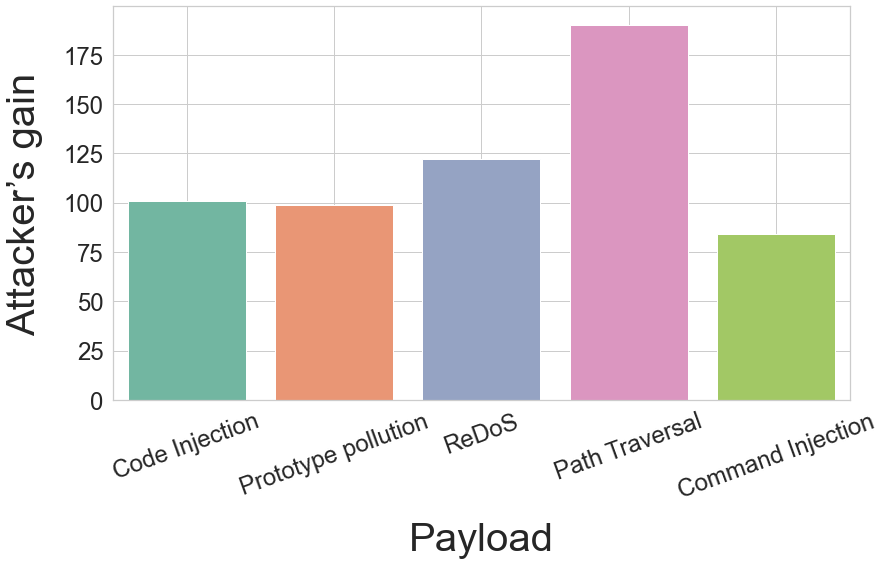

In [119]:
synk_df = pd.read_csv('synk_unique.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = synk_df['Vulnerability'].tolist()

exploits_number_dict_synk = dict()

for category in category_list:
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            # print(category)
            if legends[index] in exploits_number_dict_synk:
                num = exploits_number_dict_synk[legends[index]]
                exploits_number_dict_synk[legends[index]] = num+1
            else:
                exploits_number_dict_synk[legends[index]] = 1
            break
    
print(exploits_number_dict_synk)

df = pd.DataFrame(exploits_number_dict_synk.items(), columns=['category', 'count'])
# print(df)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", data=df)

ax.set_ylabel("Attacker’s gain", fontsize=font_size, labelpad=20)
ax.set_xlabel("Payload", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)


## Categorization (GA)

{'Path Traversal': 41, 'Prototype pollution': 38, 'Command Injection': 40, 'Code Injection': 36, 'ReDoS': 19}


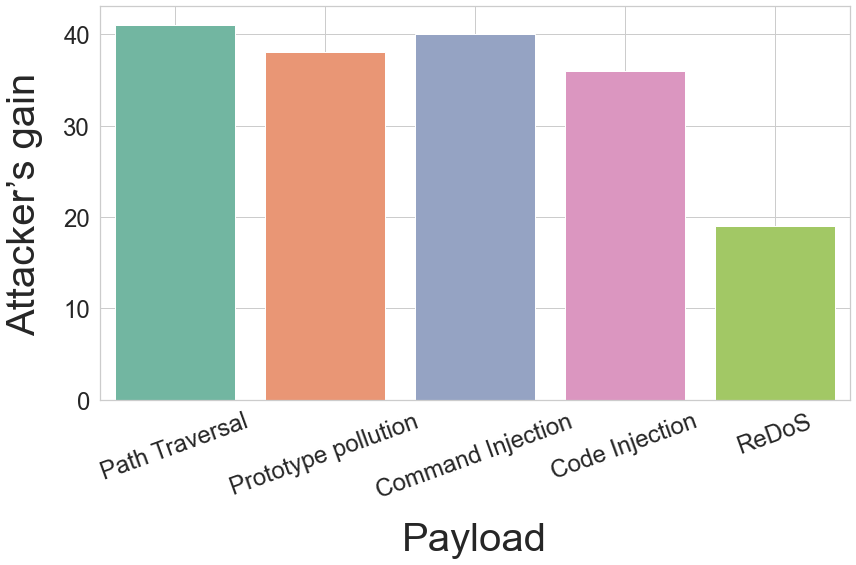

In [137]:
import csv
import pandas as pd
import numpy as np
import math
synk_df = pd.read_csv('ga_unique.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS","ReDoS","ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "regex", "regular expression","command", "traversal", "code"]
title_list = synk_df['Title'].tolist()

count=0
exploits_number_dict_ga = dict()
for title in title_list:
    if "arbitrary code execution" in title:
        if "Code Injection" in exploits_number_dict_ga:
            num = exploits_number_dict_ga["Code Injection"]
            exploits_number_dict_ga["Code Injection"] = num+1
        else:
            exploits_number_dict_ga["Code Injection"] = 1

    elif "Withdrawn" not in title:
        for index in range(len(our_category)):
            item = our_category[index]
            index_of_in = str(title).find("in ")
            if item in str(title[:index_of_in]).lower():
                if "Malicious code" not in title[:index_of_in] and \
                "discord-html" not in title[:index_of_in] and \
                "Hardcoded Initialization Vector" not in title[:index_of_in]:
                    # print(title[:index_of_in], " + ", title[index_of_in:])
                    # count+=1
                    if legends[index] in exploits_number_dict_ga:
                        num = exploits_number_dict_ga[legends[index]]
                        exploits_number_dict_ga[legends[index]] = num+1
                    else:
                        exploits_number_dict_ga[legends[index]] = 1    
                    break

print(exploits_number_dict_ga)

df = pd.DataFrame(exploits_number_dict_ga.items(), columns=['category', 'count'])
# print(df)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", data=df)

ax.set_ylabel("Attacker’s gain", fontsize=font_size, labelpad=20)
ax.set_xlabel("Payload", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)


## Categorization (Common)

{'Path Traversal': 176, 'Prototype pollution': 190, 'Code Injection': 78, 'ReDoS': 123, 'Command Injection': 114}


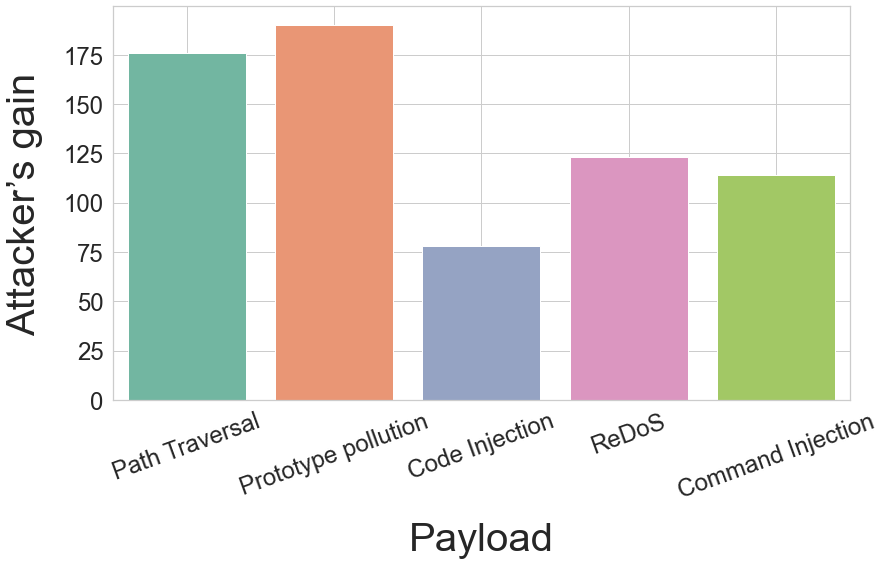

In [121]:
common_df = pd.read_csv('common.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = common_df['Vulnerability'].tolist()

exploits_number_dict = dict()

for category in category_list:
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            # print(category)
            if legends[index] in exploits_number_dict:
                num = exploits_number_dict[legends[index]]
                exploits_number_dict[legends[index]] = num+1
            else:
                exploits_number_dict[legends[index]] = 1
            break
    
print(exploits_number_dict)

df = pd.DataFrame(exploits_number_dict.items(), columns=['category', 'count'])
# print(df)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", data=df)

ax.set_ylabel("Attacker’s gain", fontsize=font_size, labelpad=20)
ax.set_xlabel("Payload", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)


## Current Status (Prototype Pollution)

In [122]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

pp_working_synk = 0
pp_working_ga = 0
pp_working_common = 0

folders = glob.glob("../prototype-pollution/*")
for folder in folders:
    json_file_path = folder+"/package.json"
    try:
        f = open(json_file_path)
        data = json.load(f)

        test_file = []
        try:
            test_file = glob.glob(folder+"/*.test.js")
            # print(test_file)
            # if len(test_file)==0:
            #     print(folder)
        except:
            traceback.print_exc()

        if "CVE" in data["id"]:
            cve = str(data["id"]).strip()
            if len(test_file)>0:
                if cve in synk_cve_lst:
                    pp_working_synk+=1
                elif cve in ga_cve_lst:
                    pp_working_ga+=1
                elif cve in common_cve_lst:
                    pp_working_common+=1
        elif len(data["id"].strip())==0:
            if len(test_file)>0:
                source1 = data["links"]["source1"]
                source2 = data["links"]["source2"]

                if "snyk" in source1 or "snyk" in source2:
                    pp_working_synk+=1
                elif "GHSA" in source1 or "GHSA" in source2:
                    pp_working_ga+=1


                # print(source1)
                # print(source2)
            
        f.close()
    except:
        # traceback.print_exc()
        pass

print(pp_working_ga)
print(pp_working_common)
print(pp_working_synk)




8
120
56


## Current Status (ReDoS)

In [123]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

redos_working_synk = 0
redos_working_ga = 0
redos_working_common = 0

folders = glob.glob("../redos/*")
for folder in folders:
    if "validator" not in folder:
        json_file_path = folder+"/package.json"
        try:
            f = open(json_file_path)
            data = json.load(f)

            test_file = []
            try:
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                # if len(test_file)==0:
                #     print(folder)
            except:
                traceback.print_exc()

            if "CVE" in data["id"]:
                cve = str(data["id"]).strip()
                if len(test_file)>0:
                    if cve in synk_cve_lst:
                        redos_working_synk+=1
                    elif cve in ga_cve_lst:
                        redos_working_ga+=1
                    elif cve in common_cve_lst:
                        redos_working_common+=1
            elif len(data["id"].strip())==0:
                if len(test_file)>0:
                    source1 = data["links"]["source1"]
                    source2 = data["links"]["source2"]

                    if "snyk" in source1 or "snyk" in source2:
                        redos_working_synk+=1
                    elif "GHSA" in source1 or "GHSA" in source2:
                        redos_working_ga+=1


                    # print(source1)
                    # print(source2)
                
            f.close()
        except:
            # traceback.print_exc()
            pass

print(redos_working_ga)
print(redos_working_common)
print(redos_working_synk)




0
48
39


## Current Status (ACE)

In [162]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

ace_working_synk = 0
ace_working_ga = 0
ace_working_common = 0

excluded_list = ["pixl-class_1.0.0", "mathjs_3.10.0", "wifiscanner_1.0.1", "safer-eval_1.3.1"]

folders = glob.glob("../ace-breakout/*")
for folder in folders:
    index = folder.rfind("/")
    main_folder_name = folder[index+1:]
    if main_folder_name not in excluded_list :
        # print(folder)
        json_file_path = folder+"/package.json"
        try:
            f = open(json_file_path)
            data = json.load(f)

            test_file = []
            try:
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                # if len(test_file)==0:
                #     print(folder)
            except:
                traceback.print_exc()

            if "CVE" in data["id"]:
                cve = str(data["id"]).strip()
                if len(test_file)>0:
                    if cve in synk_cve_lst:
                        ace_working_synk+=1
                    elif cve in ga_cve_lst:
                        ace_working_ga+=1
                    elif cve in common_cve_lst:
                        ace_working_common+=1
                    
            # elif len(data["id"].strip())==0:
            else:
                if len(test_file)>0:
                    source1 = data["links"]["source1"]
                    source2 = data["links"]["source2"]
                    
                    if "snyk" in source1 or "snyk" in source2:
                        ace_working_synk+=1
                    elif "GHSA" in source1 or "GHSA" in source2:
                        ace_working_ga+=1
                        
                    # print(source1)
                    # print(source2)
                
            f.close()
        except:
            # print(folder)
            traceback.print_exc()
            # pass

print(ace_working_ga)
print(ace_working_common)
print(ace_working_synk)




4
14
14


Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = open(json_file_path)
FileNotFoundError: [Errno 2] No such file or directory: '../ace-breakout/node_modules/package.json'
Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = open(json_file_path)
NotADirectoryError: [Errno 20] Not a directory: '../ace-breakout/README.md/package.json'
Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = open(json_file_path)
NotADirectoryError: [Errno 20] Not a directory: '../ace-breakout/package-lock.json/package.json'
Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = open(json_file_path)
NotADirectoryError: [Errno 20] Not a directory: '../ace-breakout/package.json/package.json'
Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = ope

## Current Status (command-injection )

In [125]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

ci_working_synk = 0
ci_working_ga = 0
ci_working_common = 0

excluded_list = ["aws-lambda_1.0.4", "op-browser_1.0.8", "devcert_1.1.0", "node-notifier_8.0.0", "launchpad_0.7.1",]

folders = glob.glob("../command-injection/*")
for folder in folders:
    index = folder.rfind("/")
    main_folder_name = folder[index+1:]
    if main_folder_name not in excluded_list :
        # print(folder)
        json_file_path = folder+"/package.json"
        try:
            f = open(json_file_path)
            data = json.load(f)

            test_file = []
            try:
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                # if len(test_file)==0:
                #     print(folder)
            except:
                traceback.print_exc()

            if "CVE" in data["id"]:
                cve = str(data["id"]).strip()
                if len(test_file)>0:
                    if cve in synk_cve_lst:
                        ci_working_synk+=1
                    elif cve in ga_cve_lst:
                        ci_working_ga+=1
                    elif cve in common_cve_lst:
                        ci_working_common+=1
            elif len(data["id"].strip())==0:
                if len(test_file)>0:
                    source1 = data["links"]["source1"]
                    source2 = data["links"]["source2"]

                    if "snyk" in source1 or "snyk" in source2:
                        ci_working_synk+=1
                    elif "GHSA" in source1 or "GHSA" in source2:
                        ci_working_ga+=1


                    # print(source1)
                    # print(source2)
                
            f.close()
        except:
            # traceback.print_exc()
            pass

print(ci_working_ga)
print(ci_working_common)
print(ci_working_synk)




1
72
41


## Current Status (path-traversal)

In [126]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

pt_working_synk = 0
pt_working_ga = 0
pt_working_common = 0

excluded_list = ['hserver-static_0.0.3','rollup-plugin-server_0.7.0', 'litedoc_1.0.1', 
'asset-cache_0.0.6', 'asset-cache_0.0.6', 'node-srv_2.0.0', 'nitro-server_1.3.3', 
'serverhuwenhui_1.1.0', 'bae-nodejs_1.0.0', 'static-server-gx_1.2.1', 'nopach_0.1.1', 
'rollup-plugin-serve_0.4.2', 'serverliujiayi1_1.1.0', 'node-cxc_1.0.0', 
'wuzhuang_1.0.0', 'zhangranbigman_0.0.1', 'myserve111_1.1.2', 'statichttpserver_0.9.7', 
'goserv_1.0.0', 'm-server_1.4.0', 'servewuqianqianqian_1.0.0', 'dilu_0.1.3', 
'fbr-client_1.0.3', 'intsol-package_1.0.0', 'canvas-designer_1.2.1', 'getstats_1.0.6', 
'my-sn_1.0.1']
folders = glob.glob("../path-traversal/*")
for folder in folders:
    index = folder.rfind("/")
    main_folder_name = folder[index+1:]
    if main_folder_name not in excluded_list :
        # print(folder)
        json_file_path = folder+"/package.json"
        try:
            f = open(json_file_path)
            data = json.load(f)

            test_file = []
            try:
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                # if len(test_file)==0:
                #     print(folder)
            except:
                traceback.print_exc()

            if "CVE" in data["id"]:
                cve = str(data["id"]).strip()
                if len(test_file)>0:
                    if cve in synk_cve_lst:
                        pt_working_synk+=1
                    elif cve in ga_cve_lst:
                        pt_working_ga+=1
                    elif cve in common_cve_lst:
                        pt_working_common+=1
            elif len(data["id"].strip())==0:
                if len(test_file)>0:
                    source1 = data["links"]["source1"]
                    source2 = data["links"]["source2"]

                    if "snyk" in source1 or "snyk" in source2:
                        pt_working_synk+=1
                    elif "GHSA" in source1 or "GHSA" in source2:
                        pt_working_ga+=1


                    # print(source1)
                    # print(source2)
                
            f.close()
        except:
            # traceback.print_exc()
            pass

print(pt_working_ga)
print(pt_working_common)
print(pt_working_synk)




1
70
81


## Graph

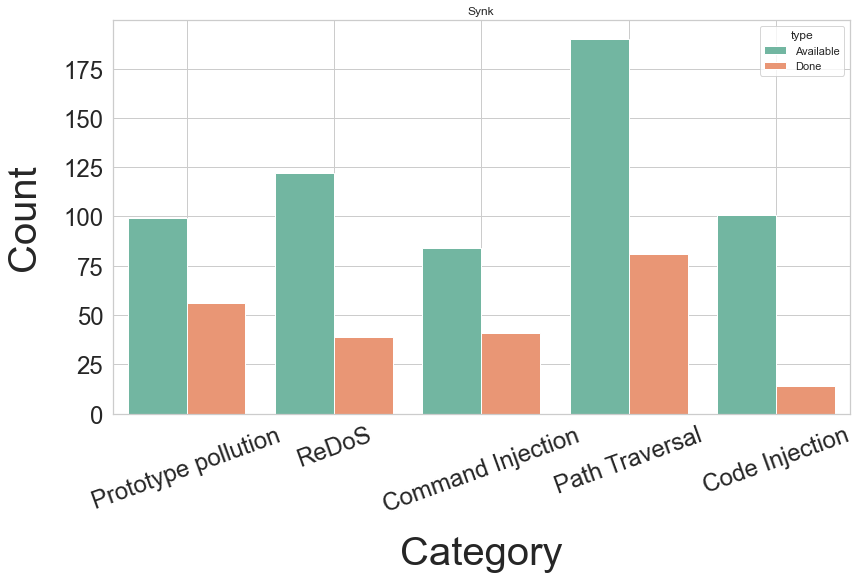

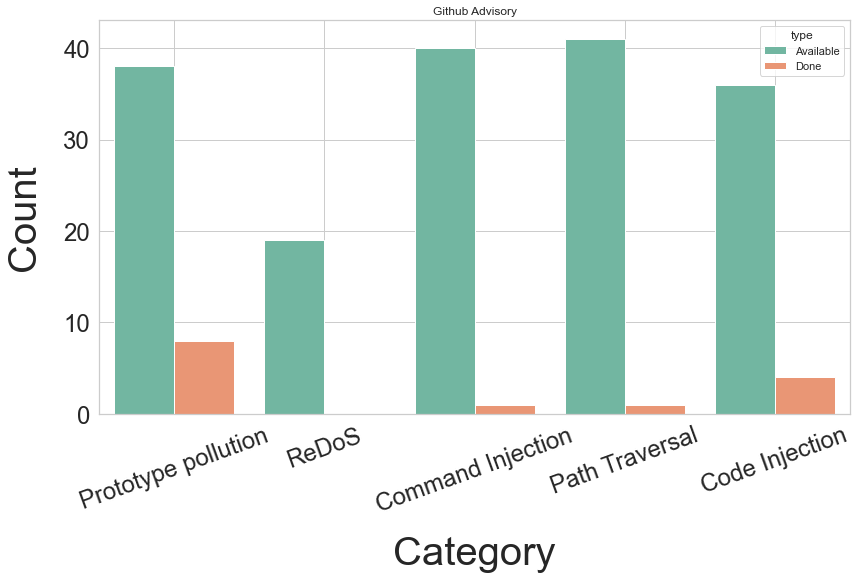

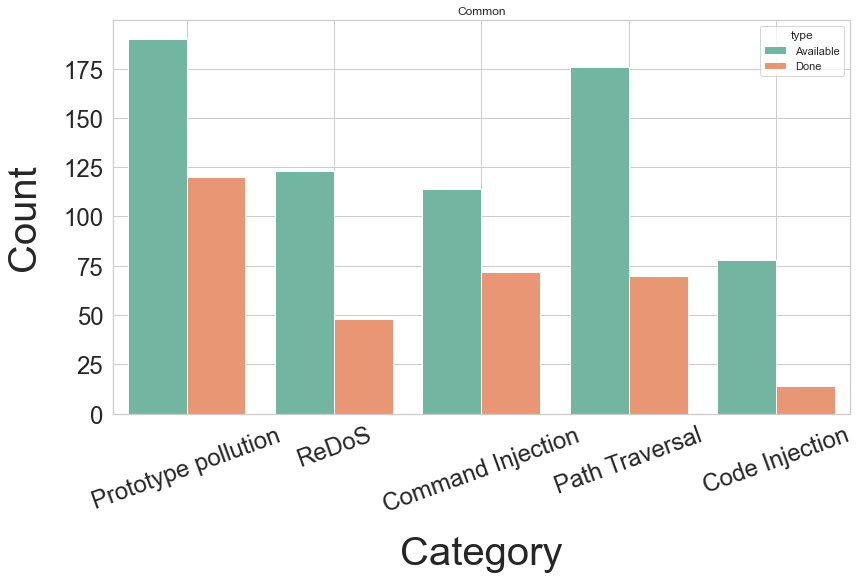

In [140]:
working_ga = [pp_working_ga, redos_working_ga, ci_working_ga , pt_working_ga, ace_working_ga ]
working_synk = [pp_working_synk, redos_working_synk, ci_working_synk , pt_working_synk, ace_working_synk ]
working_common = [pp_working_common, redos_working_common, ci_working_common , pt_working_common, ace_working_common ]

legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]

## for synk
synk_mainlst = []

# for index in range(len(our_category)):
#     synk_mainlst.append([legends[index], exploits_number_dict_synk[legends[index]], working_synk[index]])
# print(synk_mainlst)


for index in range(len(legends)):
    synk_mainlst.append([legends[index], exploits_number_dict_synk[legends[index]], "Available"])

for index in range(len(legends)):
    synk_mainlst.append([legends[index], working_synk[index], "Done"])



df_synk = pd.DataFrame(synk_mainlst, columns=["category", "count", "type"])
# df_synk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", hue="type", data=df_synk)

ax.set_ylabel("Count", fontsize=font_size, labelpad=20)
ax.set_xlabel("Category", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
ax.set_title("Synk")
plt.subplots_adjust(top=0.98, right=0.99)



## for GA
ga_mainlst = []

# for index in range(len(our_category)):
#     synk_mainlst.append([legends[index], exploits_number_dict_synk[legends[index]], working_synk[index]])
# print(synk_mainlst)


for index in range(len(legends)):
    ga_mainlst.append([legends[index], exploits_number_dict_ga[legends[index]], "Available"])

for index in range(len(legends)):
    ga_mainlst.append([legends[index], working_ga[index], "Done"])



df_ga = pd.DataFrame(ga_mainlst, columns=["category", "count", "type"])
# df_synk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", hue="type", data=df_ga)

ax.set_ylabel("Count", fontsize=font_size, labelpad=20)
ax.set_xlabel("Category", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
ax.set_title("Github Advisory")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)



## for common
common_mainlst = []

# for index in range(len(our_category)):
#     synk_mainlst.append([legends[index], exploits_number_dict_synk[legends[index]], working_synk[index]])
# print(synk_mainlst)


for index in range(len(legends)):
    common_mainlst.append([legends[index], exploits_number_dict[legends[index]], "Available"])

for index in range(len(legends)):
    common_mainlst.append([legends[index], working_common[index], "Done"])



df_common = pd.DataFrame(common_mainlst, columns=["category", "count", "type"])
# df_synk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", hue="type", data=df_common)

ax.set_ylabel("Count", fontsize=font_size, labelpad=20)
ax.set_xlabel("Category", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
ax.set_title("Common")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)


In [144]:
with open("/Users/masudulhasanmasudbhuiyan/Music/vulns4js/pt_failed_list.txt") as in_file:
    for line in in_file:
        if "FAIL" in line:
            index = line.rfind("/")
            print(line[6:index])

 node-cxc_1.0.0
 serverhuwenhui_1.1.0
 static-server-gx_1.2.1
 m-server_1.4.0
 hserver-static_0.0.3
 litedoc_1.0.1
 bae-nodejs_1.0.0
 node-srv_2.0.0
 rollup-plugin-server_0.7.0
 asset-cache_0.0.6
 rollup-plugin-serve_0.4.2
 canvas-designer_1.2.1
 fbr-client_1.0.3
 my-sn_1.0.1
 intsol-package_1.0.0
 getstats_1.0.6
 dilu_0.1.3
 serverliujiayi1_1.1.0
 statichttpserver_0.9.7
 http-live-simulator_1.0.0
 crud-file-server_0.7.0
 tinyserver_0.1.1
 serverzyy_1.0.0
 sgqserve_1.0.0
 web-node-server_0.1.0
 wrlc_0.2.5
 fast-http_0.1.3


## Working Exploits

In [38]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable
table = BeautifulTable()
table.set_style(BeautifulTable.STYLE_SEPARATED)
table.columns.alignment = BeautifulTable.ALIGN_RIGHT
table.columns.padding_left = 15
table.columns.padding_right = 15

table.columns.headers = ["Type of vulnerability", "Number of exploits"]

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
total_exploits = 0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    # print(folders)
    working_exploits = 0
    for folder in folders:
        try:
            if os.path.isdir(folder):
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                if len(test_file)==0:
                    # if _path == "prototype-pollution" and "node_modules" not in folder:
                    #     try:
                    #         shutil.rmtree(folder)
                    #     except OSError as e:
                    #         print("Error: %s - %s." % (e.filename, e.strerror))
                    pass
                    # print(folder)
                else:
                    working_exploits+=1
        except:
            # traceback.print_exc()
            pass
    # print(_path)
    # print(working_exploits)
    total_exploits+=working_exploits
    table.rows.append([_path,  working_exploits])

table.rows.append(["Total",  total_exploits])
table.columns.headers = ["Type of vulnerability", "Number of exploits"]
print(table)





+=====================+=====+
| prototype-pollution | 192 |
+---------------------+-----+
|    ace-breakout     | 40  |
+---------------------+-----+
|  command-injection  | 101 |
+---------------------+-----+
|   path-traversal    | 169 |
+---------------------+-----+
|        redos        | 98  |
+---------------------+-----+
|        Total        | 600 |
+---------------------+-----+


## Available Sink

In [28]:
import glob
import json
import traceback
import pandas as pd
import shutil


lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]

for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    working_exploits = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                # print(data)

                sink = data["sink"]
                if len(sink.strip())!=0:
                    print(folder)
                    print(sink)
            except:
                # traceback.print_exc()
                pass




../prototype-pollution/field_1.0.1
./set.js:36
../prototype-pollution/dotty_0.0.1
./set.js:36
../prototype-pollution/firebase-util_0.3.2
./set.js:36
../prototype-pollution/total.js_3.4.6
./set.js:36
../prototype-pollution/mithril_1.0.0
./set.js:36
../prototype-pollution/ini_1.3.5
./set.js:36
../prototype-pollution/mixin-deep_1.3.0
index.js:12:12
../prototype-pollution/mout_1.0.0
./set.js:36
../prototype-pollution/jointjs_2.2.1
./set.js:36
../prototype-pollution/mergify_1.0.2
./set.js:36
../prototype-pollution/assign-deep_1.0.0
./set.js:36
../prototype-pollution/decal_2.0.0
src/utils/set.js:62:21
../prototype-pollution/supermixer_1.0.3
./set.js:36
../prototype-pollution/set-value_3.0.0
./set.js:36
../prototype-pollution/fluentui-styles_0.47.15
./set.js:36
../prototype-pollution/safetydance_2.0.1
./set.js:36
../prototype-pollution/extend-merge_1.0.5
./set.js:36
../prototype-pollution/algoliasearch-helper_3.6.0
src/functions/merge.js:38:19
../prototype-pollution/js-data_3.0.9
./set.js:36


## Available Patch

In [44]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable
table = BeautifulTable()
table.set_style(BeautifulTable.STYLE_SEPARATED)
table.columns.alignment = BeautifulTable.ALIGN_RIGHT
table.columns.padding_left = 15
table.columns.padding_right = 15

main_lst = []

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0

for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                # print(data)

                fixed_version = data["fixedVersion"]
                if len(fixed_version.strip())>0 and fixed_version.lower()!="n/a":
                    availble_patch+=1
                    individual_patch+=1
                    # print(fixed_version)
                else:
                    individual_unavailable+=1
            except:
                # traceback.print_exc()
                pass
    
    main_lst.append([individual_unavailable, individual_patch])
    table.rows.append([_path,  individual_patch])

table.columns.headers = ["Type of vulnerability", "Number of Patch"]
print(table)
print("Total Patch ===> ",availble_patch)


+=====================+=====+
| prototype-pollution | 112 |
+---------------------+-----+
|    ace-breakout     | 13  |
+---------------------+-----+
|  command-injection  | 37  |
+---------------------+-----+
|   path-traversal    | 16  |
+---------------------+-----+
|        redos        | 76  |
+---------------------+-----+
Total Patch ===>  254


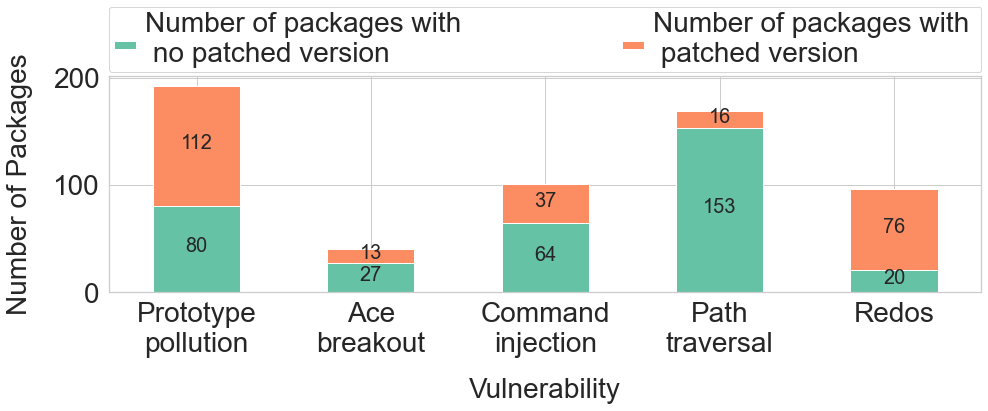

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# pandas dataframe
df = pd.DataFrame(main_lst, columns=["Number of packages with \n no patched version", "Number of packages with \n patched version"])
df.index = ["Prototype\npollution", "Ace\nbreakout", "Command\ninjection", "Path\ntraversal", "Redos"]

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (14, 6)
# fig, ax = plt.subplots()
font_size = 28
legend_font_size = 28

ax = df.plot(kind='bar', stacked=True, rot=0, xlabel='Class', ylabel='Count')
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=20, padding=3)

ax.set_ylabel("Number of Packages", fontsize=font_size, labelpad=20)
ax.set_xlabel("Vulnerability", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=0)
ax.grid("both")

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
plt.setp(ax.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.8, right=0.99, bottom=.3)
plt.savefig("patches.pdf")


## Figure 1

In [116]:
import csv
import pandas as pd
import numpy as np
import math

synk_df = pd.read_csv('synk_unique.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = synk_df['Vulnerability'].tolist()

exploits_number_dict = dict()

for category in category_list:
    found = False
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            # print(category)
            if legends[index] in exploits_number_dict:
                num = exploits_number_dict[legends[index]]
                exploits_number_dict[legends[index]] = num+1
            else:
                exploits_number_dict[legends[index]] = 1

            found = True
            break
    
    if not found:
        if category in exploits_number_dict:
                num = exploits_number_dict[category]
                exploits_number_dict[category] = num+1
        else:
            exploits_number_dict[category] = 1

# exploits_number_dict = dict(sorted(exploits_number_dict.items(), key=lambda item: item[1], reverse=True))
# for key in exploits_number_dict:
#     print(key, " =====> ", exploits_number_dict[key])


synk_df = pd.read_csv('ga_unique.csv')
legends = ["Prototype pollution", "ReDoS","ReDoS","ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "regex", "regular expression","command", "traversal", "code"]
title_list = synk_df['Title'].tolist()

count=0
for title in title_list:
    # print(title)
    found = False
    if "arbitrary code execution" in title:
        if "Code Injection" in exploits_number_dict:
            num = exploits_number_dict["Code Injection"]
            exploits_number_dict["Code Injection"] = num+1
        else:
            exploits_number_dict["Code Injection"] = 1

    elif "Withdrawn" not in title:
        for index in range(len(our_category)):
            item = our_category[index]
            index_of_in = str(title).find("in ")
            if item in str(title[:index_of_in]).lower():
                if "Malicious code" not in title[:index_of_in] and \
                "discord-html" not in title[:index_of_in] and \
                "Hardcoded Initialization Vector" not in title[:index_of_in]:
                    # print(title[:index_of_in], " + ", title[index_of_in:])
                    # count+=1
                    if legends[index] in exploits_number_dict:
                        num = exploits_number_dict[legends[index]]
                        exploits_number_dict[legends[index]] = num+1
                    else:
                        exploits_number_dict[legends[index]] = 1    
                    found = True
                    break
        
    if not found:
        if "Malicious Package" in title:
            title = "Malicious Package"
        if "Denial of Service" in title:
            title = "Denial of Service (DoS)"
        if "Cross-Site Scripting" in title or "Cross-site scripting" in title:
            title = "Cross-site Scripting (XSS)"
        if title in exploits_number_dict:
                num = exploits_number_dict[title]
                exploits_number_dict[title] = num+1
        else:
            exploits_number_dict[title] = 1


        
common_df = pd.read_csv('common.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = common_df['Vulnerability'].tolist()

for category in category_list:
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            # print(category)
            if legends[index] in exploits_number_dict:
                num = exploits_number_dict[legends[index]]
                exploits_number_dict[legends[index]] = num+1
            else:
                exploits_number_dict[legends[index]] = 1
            break
    
exploits_number_dict = dict(sorted(exploits_number_dict.items(), key=lambda item: item[1], reverse=True))
final_dict= dict()
for key in exploits_number_dict:
    if exploits_number_dict[key]>12:
        final_dict[key] = exploits_number_dict[key]
    # print(key, " =====> ", exploits_number_dict[key])

# print(final_dict)


# print(exploits_number_dict_ga)

df = pd.DataFrame(final_dict.items(), columns=['category', 'count'])
print(df)

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
legends = ["Prototype pollution", "Code Injection", "Command Injection", "Path Traversal", "ReDoS"]
total_exploits = 0
working_dict = dict()
for index in range(len(lst)):
    _path = lst[index]
    folders = glob.glob("../"+_path+"/*")
    working_exploits = 0
    for folder in folders:
        try:
            if os.path.isdir(folder):
                test_file = glob.glob(folder+"/*.test.js")
                if len(test_file)==0:
                    pass
                else:
                    working_exploits+=1
        except:
            # traceback.print_exc()
            pass
    working_dict[legends[index]] = working_exploits

print(working_dict)

lst =[]
for item in df['category']:
    if item in working_dict:
        lst.append(working_dict[item])


    

# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set()
# sns.set_style("whitegrid")
# sns.set_palette("Set2")
# plt.rcParams["figure.figsize"] = (12, 8)
# fig, ax = plt.subplots()
# font_size = 40
# legend_font_size = 24

# ax = sns.barplot(x="category", y="count", data=df)

# ax.set_ylabel("Attacker’s gain", fontsize=font_size, labelpad=20)
# ax.set_xlabel("Payload", fontsize=font_size, labelpad=20)

# ax.tick_params(axis='both', which='major')
# ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
# ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
# ax.grid("both")
# # plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
# fig.tight_layout()
# plt.subplots_adjust(top=0.98, right=0.99)


                         category  count
0               Malicious Package    730
1      Cross-site Scripting (XSS)    426
2                  Path Traversal    407
3             Prototype pollution    327
4                           ReDoS    264
5               Command Injection    238
6                  Code Injection    215
7         Denial of Service (DoS)    114
8                  Use After Free     60
9            Information Exposure     28
10                  SQL Injection     20
11             Out-of-bounds Read     17
12  Uninitialized Memory Exposure     16
13      Improper Input Validation     13
14          Authentication Bypass     13
15                  Open Redirect     13
{'Prototype Pollution': 192, 'Code Injection': 40, 'Command Injection': 101, 'Path Traversal': 169, 'ReDoS': 98}
